In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sci

In [2]:
pd.set_option('display.max_columns',None)
data = pd.read_excel("Supplychain train dataset.xlsx")

In [3]:
data.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,0,1,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,0,0,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,0,0,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,0,1,112,25.0,2009.0,18,0,C,6,24,24071


In [4]:
data.isnull().sum()

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       877
wh_est_year                     10545
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      805
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

### Imputing Missing Values:

In [5]:
print("Mean of the columns workers_num ",data['workers_num'].mean())
print("Mean of the columns workers_num ",data['workers_num'].median())

Mean of the columns workers_num  28.93639825130447
Mean of the columns workers_num  28.0


In [6]:
# Replacing the NULL values by median:
data['workers_num'] = data['workers_num'].fillna(28)

In [7]:
# Since approved_wh_govt_certificate is a categorical columns lets check the mode:

print("Mean of the columns workers_num ",data['approved_wh_govt_certificate'].mode())

Mean of the columns workers_num  0    C
Name: approved_wh_govt_certificate, dtype: object


In [8]:
# Replacing the NULL values with mode:
data['approved_wh_govt_certificate'] = data['approved_wh_govt_certificate'].fillna('C')

### Lets convert the categoical column to numerical:

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [11]:
for col in ['Location_type','WH_capacity_size','zone','WH_regional_zone','wh_owner_type','approved_wh_govt_certificate']:
    data[col] = label_encoder.fit_transform(data[col])

In [12]:
data.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,1,2,3,5,3,1,2,4651,1,24,0,1,1,91,29.0,NaN,13,0,0,5,15,17115
1,WH_100001,EID_50001,0,0,1,4,0,0,4,6217,0,47,0,0,1,210,31.0,NaN,4,0,0,3,17,5074
2,WH_100002,EID_50002,0,1,2,1,1,0,4,4306,0,64,0,0,0,161,37.0,NaN,17,0,0,6,22,23137
3,WH_100003,EID_50003,0,1,1,2,7,4,2,6000,1,50,0,0,0,103,21.0,NaN,17,1,1,3,27,22115
4,WH_100004,EID_50004,0,0,1,4,3,1,2,4740,0,42,1,0,1,112,25.0,2009.0,18,0,4,6,24,24071


### Dropping ware_house_ID and WH_Manager_ID:

In [15]:
data = data.drop(['Ware_house_ID','WH_Manager_ID'], axis = 1)

In [16]:
data.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,1,2,3,5,3,1,2,4651,1,24,0,1,1,91,29.0,NaN,13,0,0,5,15,17115
1,0,0,1,4,0,0,4,6217,0,47,0,0,1,210,31.0,NaN,4,0,0,3,17,5074
2,0,1,2,1,1,0,4,4306,0,64,0,0,0,161,37.0,NaN,17,0,0,6,22,23137
3,0,1,1,2,7,4,2,6000,1,50,0,0,0,103,21.0,NaN,17,1,1,3,27,22115
4,0,0,1,4,3,1,2,4740,0,42,1,0,1,112,25.0,2009.0,18,0,4,6,24,24071


### Imputing wh_est_year using CART algorithm:

In [19]:
df = data.copy()

In [20]:
df.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,1,2,3,5,3,1,2,4651,1,24,0,1,1,91,29.0,NaN,13,0,0,5,15,17115
1,0,0,1,4,0,0,4,6217,0,47,0,0,1,210,31.0,NaN,4,0,0,3,17,5074
2,0,1,2,1,1,0,4,4306,0,64,0,0,0,161,37.0,NaN,17,0,0,6,22,23137
3,0,1,1,2,7,4,2,6000,1,50,0,0,0,103,21.0,NaN,17,1,1,3,27,22115
4,0,0,1,4,3,1,2,4740,0,42,1,0,1,112,25.0,2009.0,18,0,4,6,24,24071


**Splitting data into two segements:**

In [21]:
complete_data = df.dropna(subset=['wh_est_year'])
incomplete_data = df[df['wh_est_year'].isnull()]

In [24]:
complete_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11605 entries, 4 to 22145
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 11605 non-null  int32  
 1   WH_capacity_size              11605 non-null  int32  
 2   zone                          11605 non-null  int32  
 3   WH_regional_zone              11605 non-null  int32  
 4   num_refill_req_l3m            11605 non-null  int64  
 5   transport_issue_l1y           11605 non-null  int64  
 6   Competitor_in_mkt             11605 non-null  int64  
 7   retail_shop_num               11605 non-null  int64  
 8   wh_owner_type                 11605 non-null  int32  
 9   distributor_num               11605 non-null  int64  
 10  flood_impacted                11605 non-null  int64  
 11  flood_proof                   11605 non-null  int64  
 12  electric_supply               11605 non-null  int64  
 13  d

In [25]:
incomplete_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10545 entries, 0 to 22149
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 10545 non-null  int32  
 1   WH_capacity_size              10545 non-null  int32  
 2   zone                          10545 non-null  int32  
 3   WH_regional_zone              10545 non-null  int32  
 4   num_refill_req_l3m            10545 non-null  int64  
 5   transport_issue_l1y           10545 non-null  int64  
 6   Competitor_in_mkt             10545 non-null  int64  
 7   retail_shop_num               10545 non-null  int64  
 8   wh_owner_type                 10545 non-null  int32  
 9   distributor_num               10545 non-null  int64  
 10  flood_impacted                10545 non-null  int64  
 11  flood_proof                   10545 non-null  int64  
 12  electric_supply               10545 non-null  int64  
 13  d

In [27]:
predictor_cols = df.drop('wh_est_year', axis =1).columns
target_cols = 'wh_est_year'

In [29]:
X_train = complete_data[predictor_cols]
y_train = complete_data[target_cols]

In [30]:
from sklearn.tree import DecisionTreeRegressor

# Building the model:
CART_model = DecisionTreeRegressor()

#Fitting the data:
CART_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [31]:
X_test = incomplete_data[predictor_cols]
imputed_values = CART_model.predict(X_test)

In [32]:
#Converting the output to integer
imputed_values = imputed_values.astype(int)
#Filling in the msising values with the predicted values:
incomplete_data[target_cols] = imputed_values

C:\Users\varun\AppData\Local\Temp\ipykernel_4644\3712763395.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incomplete_data[target_cols] = imputed_values


In [33]:
# Combine complete and imputed data
imputed_data = pd.concat([complete_data, incomplete_data])

In [41]:
imputed_data.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
4,0,0,1,4,3,1,2,4740,0,42,1,0,1,112,25.0,2009.0,18,0,4,6,24,24071
5,0,2,3,0,8,0,2,5053,1,37,0,0,1,152,35.0,2009.0,23,1,1,3,3,32134
6,0,0,3,5,8,0,4,4449,0,38,0,0,1,77,27.0,2010.0,24,0,2,3,6,30142
8,0,2,2,5,8,1,4,5381,1,42,0,0,1,124,22.0,2013.0,13,1,1,5,2,18082
10,0,0,1,5,7,1,3,4623,0,31,0,0,1,150,37.0,1999.0,17,0,3,4,6,21125


In [38]:
imputed_data['wh_est_year'].value_counts()

2019.0    1039
2017.0     988
2016.0     961
2014.0     941
2020.0     931
2021.0     928
2018.0     917
2013.0     908
2010.0     860
2006.0     848
2008.0     846
2005.0     837
2011.0     836
2007.0     829
2012.0     827
2015.0     819
2000.0     818
2009.0     818
2001.0     802
2002.0     793
2004.0     783
1998.0     777
1999.0     723
2003.0     651
2022.0     634
1997.0     528
1996.0     294
2023.0     214
Name: wh_est_year, dtype: int64

<AxesSubplot:xlabel='wh_est_year', ylabel='product_wg_ton'>

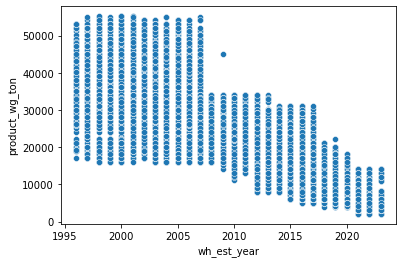

In [42]:
sns.scatterplot(data = imputed_data, x='wh_est_year', y='product_wg_ton')

<AxesSubplot:xlabel='wh_est_year', ylabel='product_wg_ton'>

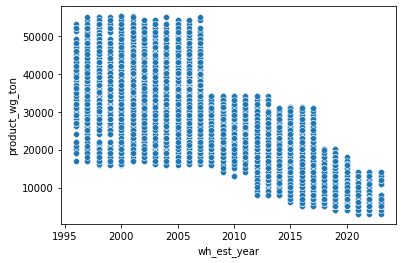

In [51]:
sns.scatterplot(data = data, x='wh_est_year', y='product_wg_ton')

<AxesSubplot:xlabel='wh_est_year', ylabel='Count'>

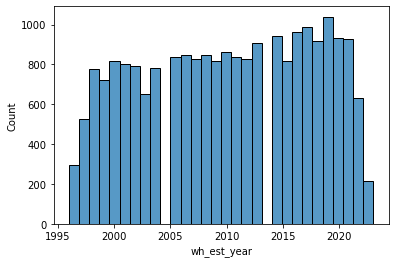

In [50]:
sns.histplot(data = imputed_data, x='wh_est_year')

<AxesSubplot:xlabel='wh_est_year', ylabel='Count'>

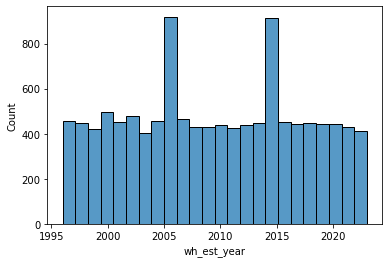

In [45]:
sns.histplot(data = data, x='wh_est_year')

<AxesSubplot:xlabel='wh_est_year'>

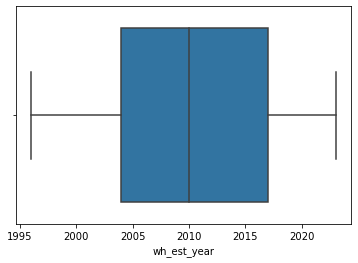

In [55]:
sns.boxplot(data = imputed_data, x='wh_est_year')

<AxesSubplot:>

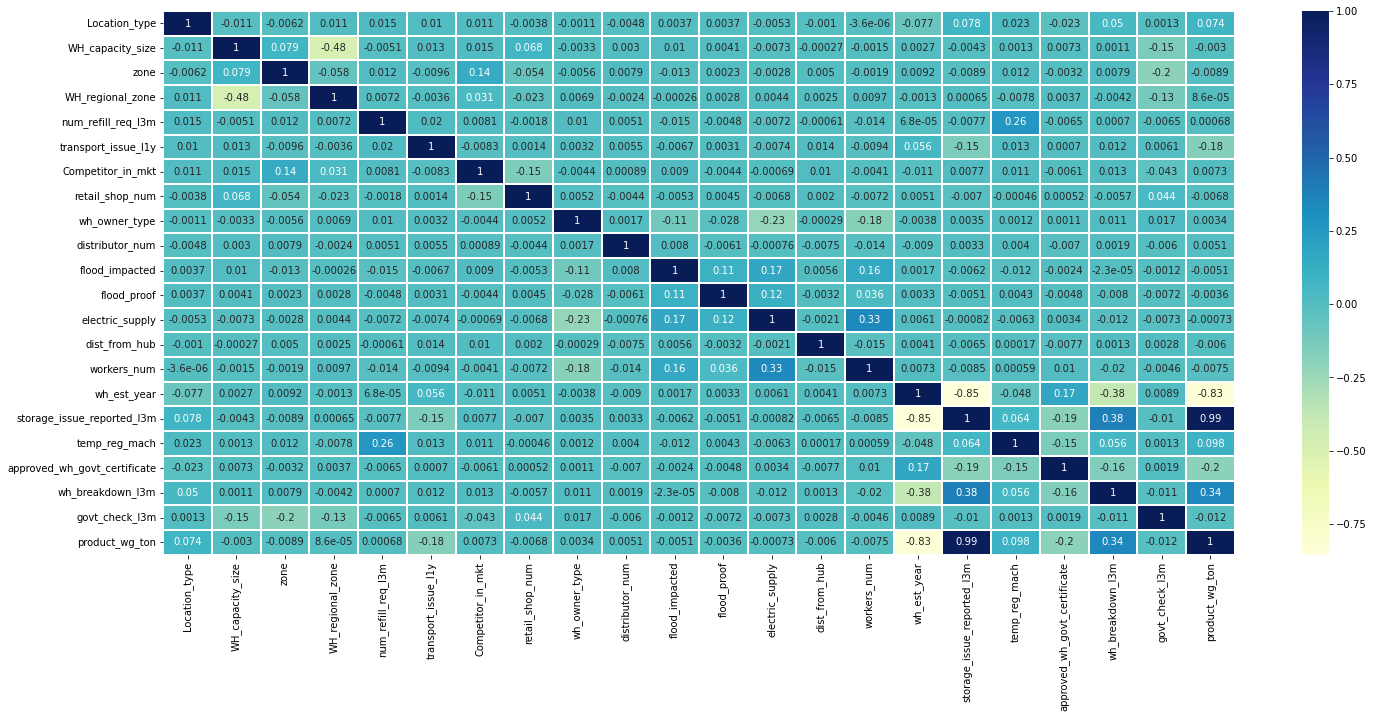

In [43]:
plt.figure(figsize=(24,10))

corr_mat = imputed_data.corr()
mask = np.triu(np.ones_like(corr_mat, dtype= bool))
sns.heatmap(corr_mat,
            cmap="YlGnBu",
           annot = True,
           linewidths=.2)

In [308]:
imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22150 entries, 4 to 22149
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 22150 non-null  int32  
 1   WH_capacity_size              22150 non-null  int32  
 2   zone                          22150 non-null  int32  
 3   WH_regional_zone              22150 non-null  int32  
 4   num_refill_req_l3m            22150 non-null  int64  
 5   transport_issue_l1y           22150 non-null  int64  
 6   Competitor_in_mkt             22150 non-null  int64  
 7   retail_shop_num               22150 non-null  int64  
 8   wh_owner_type                 22150 non-null  int32  
 9   distributor_num               22150 non-null  int64  
 10  flood_impacted                22150 non-null  int64  
 11  flood_proof                   22150 non-null  int64  
 12  electric_supply               22150 non-null  int64  
 13  d

### Experimenting with other columns:

In [78]:
experiment_data = imputed_data.copy().reset_index()

In [80]:
experiment_data = experiment_data.drop('index', axis = 1)

In [83]:
experiment_data.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,0,1,4,3,1,2,4740,0,42,1,0,1,112,25.0,2009.0,18,0,4,6,24,24071
1,0,2,3,0,8,0,2,5053,1,37,0,0,1,152,35.0,2009.0,23,1,1,3,3,32134
2,0,0,3,5,8,0,4,4449,0,38,0,0,1,77,27.0,2010.0,24,0,2,3,6,30142
3,0,2,2,5,8,1,4,5381,1,42,0,0,1,124,22.0,2013.0,13,1,1,5,2,18082
4,0,0,1,5,7,1,3,4623,0,31,0,0,1,150,37.0,1999.0,17,0,3,4,6,21125


**1. Replacing the trasport issues with 0 or 1 depending on the threshold value:**

In [84]:
threshold =3

# Iterate over the column and modify the values
for i in range(len(experiment_data['transport_issue_l1y'])):
    if experiment_data.loc[i, 'transport_issue_l1y'] < threshold:
        experiment_data.loc[i, 'transport_issue_l1y'] = 0
    else:
        experiment_data.loc[i, 'transport_issue_l1y'] = 1

In [86]:
experiment_data['transport_issue_l1y'].value_counts()

0    19522
1     2628
Name: transport_issue_l1y, dtype: int64

**2. Adding storage issues and wh bearkdown issues columns:**

In [286]:
experiment_data['total_issues'] = experiment_data['storage_issue_reported_l3m']+ experiment_data['wh_breakdown_l3m']

<AxesSubplot:xlabel='total_issues', ylabel='product_wg_ton'>

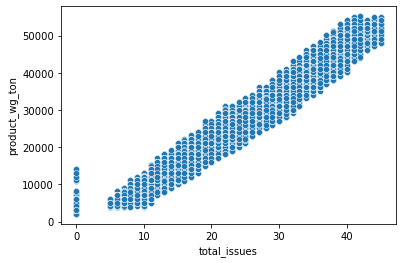

In [287]:
sns.scatterplot(data = experiment_data , x='total_issues',y='product_wg_ton')

<AxesSubplot:>

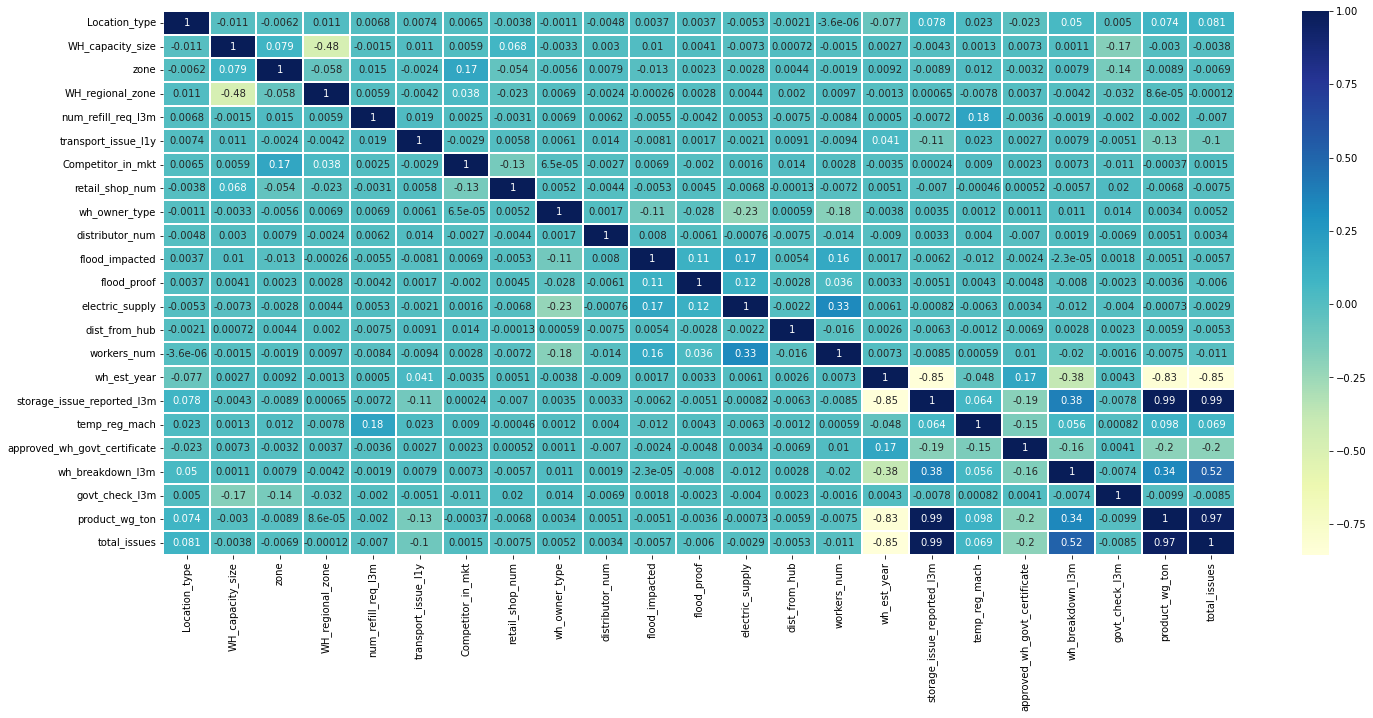

In [288]:
plt.figure(figsize=(24,10))

corr_mat = experiment_data.corr()
mask = np.triu(np.ones_like(experiment_data, dtype= bool))
sns.heatmap(corr_mat,
            cmap="YlGnBu",
           annot = True,
           linewidths=.2)

Since the new column is highly corelated to other columns, so it will introduce muticolinearity in the dataset

In [196]:
experiment_data = experiment_data.drop('storage_wh_breakdown_issues_l3m', axis = 1)

**3. Replacing num_refill_req_l3m with 0 or 1 depending on the threshold value:**

In [130]:
experiment_data['num_refill_req_l3m'].value_counts()

5    2651
8    2642
3    2618
0    2583
7    2541
4    2513
1    2503
6    2491
2    1608
Name: num_refill_req_l3m, dtype: int64

In [131]:
threshold =4

# Iterate over the column and modify the values
for i in range(len(experiment_data['num_refill_req_l3m'])):
    if experiment_data.loc[i, 'num_refill_req_l3m'] <= threshold:
        experiment_data.loc[i, 'num_refill_req_l3m'] = 0
    else:
        experiment_data.loc[i, 'num_refill_req_l3m'] = 1

**3. Replacing Competitor_in_mkt with 0 or 1 depending on the threshold value:**

In [132]:
experiment_data.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,0,1,4,0,0,2,4740,0,42,1,0,1,112,25.0,2009.0,18,0,4,6,24,24071
1,0,2,3,0,1,0,2,5053,1,37,0,0,1,152,35.0,2009.0,23,1,1,3,3,32134
2,0,0,3,5,1,0,4,4449,0,38,0,0,1,77,27.0,2010.0,24,0,2,3,6,30142
3,0,2,2,5,1,0,4,5381,1,42,0,0,1,124,22.0,2013.0,13,1,1,5,2,18082
4,0,0,1,5,1,0,3,4623,0,31,0,0,1,150,37.0,1999.0,17,0,3,4,6,21125


In [177]:
threshold =3

# Iterate over the column and modify the values
for i in range(len(experiment_data['Competitor_in_mkt'])):
    if experiment_data.loc[i, 'Competitor_in_mkt'] <= threshold:
        experiment_data.loc[i, 'Competitor_in_mkt'] = 0
    else:
        experiment_data.loc[i, 'Competitor_in_mkt'] = 1

In [178]:
experiment_data.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,0,1,4,0,0,0,4740,0,42,1,0,1,112,25.0,2009.0,18,0,4,6,24,24071
1,0,2,3,0,1,0,0,5053,1,37,0,0,1,152,35.0,2009.0,23,1,1,3,3,32134
2,0,0,3,5,1,0,1,4449,0,38,0,0,1,77,27.0,2010.0,24,0,2,3,6,30142
3,0,2,2,5,1,0,1,5381,1,42,0,0,1,124,22.0,2013.0,13,1,1,5,2,18082
4,0,0,1,5,1,0,0,4623,0,31,0,0,1,150,37.0,1999.0,17,0,3,4,6,21125


<AxesSubplot:>

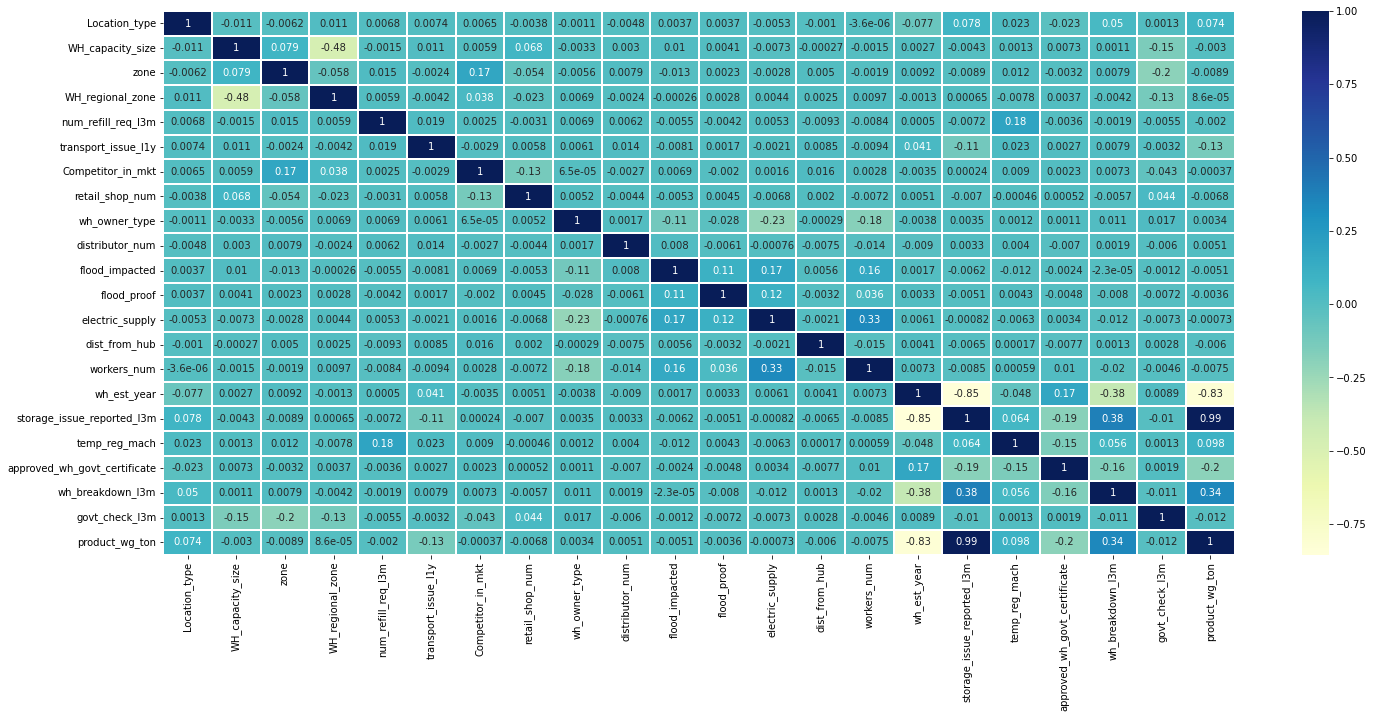

In [181]:
plt.figure(figsize=(24,10))

corr_mat = experiment_data.corr()
mask = np.triu(np.ones_like(experiment_data, dtype= bool))
sns.heatmap(corr_mat,
            cmap="YlGnBu",
           annot = True,
           linewidths=.2)

**4. Log Transforming features:**

<AxesSubplot:xlabel='govt_check_l3m', ylabel='Count'>

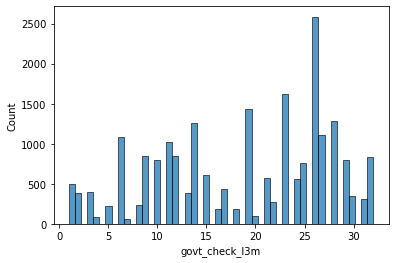

In [263]:
sns.histplot(data = experiment_data, x = 'govt_check_l3m', bins=50)

<AxesSubplot:xlabel='govt_check_l3m', ylabel='Count'>

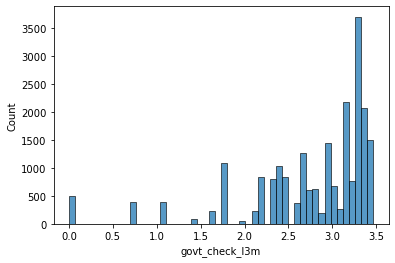

In [264]:
sns.histplot(data = experiment_data, x = np.log(experiment_data['govt_check_l3m']), bins=50)

<AxesSubplot:xlabel='dist_from_hub', ylabel='Count'>

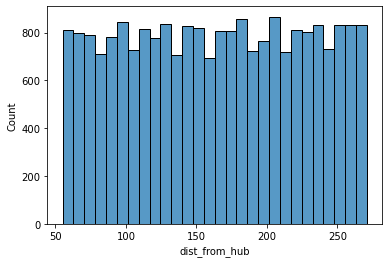

In [232]:
sns.histplot(data = experiment_data, x = 'dist_from_hub')

<AxesSubplot:xlabel='dist_from_hub', ylabel='Count'>

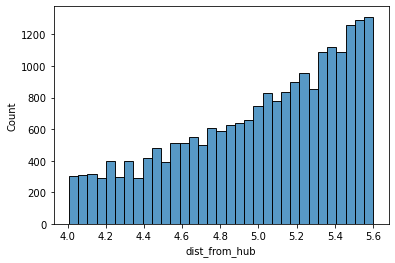

In [229]:
sns.histplot(data = experiment_data, x = np.log(experiment_data['dist_from_hub']))

Lets log transform **dist_from_hub** and **govt_check_l3m**

In [265]:
experiment_data[['govt_check_l3m','dist_from_hub']] = np.log(experiment_data[['govt_check_l3m','dist_from_hub']])

In [306]:
experiment_data.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,0,1,4,0,0,0,4740,0,42,1,0,1,4.718499,25.0,2009.0,18,0,4,6,3.178054,24071
1,0,2,3,0,1,0,0,5053,1,37,0,0,1,5.023881,35.0,2009.0,23,1,1,3,1.098612,32134
2,0,0,3,5,1,0,1,4449,0,38,0,0,1,4.343805,27.0,2010.0,24,0,2,3,1.791759,30142
3,0,2,2,5,1,0,1,5381,1,42,0,0,1,4.820282,22.0,2013.0,13,1,1,5,0.693147,18082
4,0,0,1,5,1,0,0,4623,0,31,0,0,1,5.010635,37.0,1999.0,17,0,3,4,1.791759,21125


In [309]:
experiment_data[['zone','WH_regional_zone']].value_counts()

zone  WH_regional_zone
1     5                   3963
3     5                   2138
      3                   1748
1     4                   1684
3     4                   1317
2     1                   1278
      5                   1220
1     3                   1052
2     4                    982
1     2                    838
3     2                    827
2     2                    789
      3                    781
1     1                    772
      0                    760
2     0                    594
3     1                    592
      0                    433
0     3                    127
      2                     98
      4                     62
      5                     55
      0                     40
dtype: int64

**Building the model:**

In [299]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

In [300]:
X = experiment_data.drop('product_wg_ton', axis =1)
y = experiment_data['product_wg_ton']

In [301]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

#cerating instance of GradientBoostingRegressor()
model= GradientBoostingRegressor()
#Fitting to the train data
model.fit(X_train,y_train)
#Predicting on test data:
y_preds = model.predict(X_test)

#Calculating the r2_score and RMSE:
r2 = r2_score(y_test,y_preds)
rmse = np.sqrt(mean_squared_error(y_test,y_preds))
print("r2_score:{}".format(r2))
print("RMSE : {}".format(rmse))

r2_score:0.9931550934935867
RMSE : 958.8336397381371


**K-Fold Cross Validation:**

In [302]:
from sklearn.model_selection import cross_val_score

In [303]:
cv_score = cross_val_score(GradientBoostingRegressor(), X_train, y_train, scoring='r2', cv=5)
print(cv_score)
print("Avg_score:",np.mean(cv_score))

[0.99259843 0.99271089 0.99317619 0.99318373 0.99329143]
Avg_score: 0.9929921338373653


**Feature Importance:**

In [304]:
# Retrieve the feature importance scores
importance_scores = model.feature_importances_

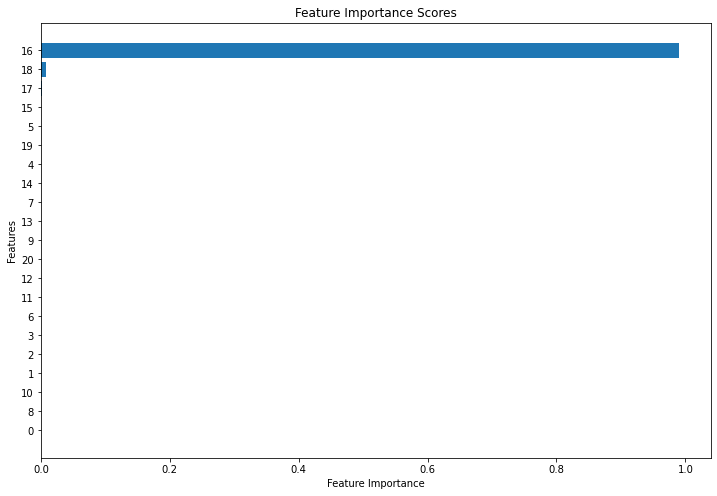

In [305]:
# Assuming 'importance_scores' contains the feature importance scores
features = np.arange(len(importance_scores))
sorted_indices = np.argsort(importance_scores)

# Create a horizontal bar plot
plt.figure(figsize=(12,8))
plt.barh(features,importance_scores[sorted_indices])
plt.yticks(features, sorted_indices)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Scores')
plt.show()

**Principal Component Analysis:**

In [274]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [275]:
def custom_PCA(X):
    n_comp = len(X.columns)
    
    #applying standard scaler for feature scaling
    sc = StandardScaler()
    X= sc.fit_transform(X)
    
    for i in range(1,n_comp):
        pca = PCA(n_components =i)
        p_comp = pca.fit_transform(X)
        evr = np.cumsum(pca.explained_variance_ratio_)
        if evr[i-1] > 0.9:
            pcs = i
            break
            
    print('Explained Variance Ratio after PCA is :', evr)
    #Creating a dataframe of Principle components
    col = []
    for j in range(1,pcs+1):
        col.append('PC'+str(j))
    pca_df = pd.DataFrame(p_comp, columns = col)
    return pca_df

In [276]:
pca_df = custom_PCA(experiment_data.drop('product_wg_ton', axis = 1))

Explained Variance Ratio after PCA is : [0.1058173  0.18395601 0.2572662  0.31805683 0.37579404 0.42454809
 0.47320004 0.52112707 0.56897065 0.61643676 0.66271619 0.70735734
 0.75083403 0.79219106 0.83170963 0.86924067 0.90553787]


In [277]:
pca_df = pca_df.join(data['product_wg_ton'], how='left')
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,product_wg_ton
0,0.310023,1.728621,-1.351101,1.270462,-1.217572,-0.097118,0.168269,-0.247574,0.827693,-0.087618,-0.218347,-0.589308,-0.560478,2.082737,-1.592776,-0.401479,0.756654,17115
1,0.700300,0.122543,3.190815,-0.766681,1.522447,0.924472,-0.981116,1.020838,-0.385418,-0.214259,0.140256,0.154476,-0.758169,0.055781,1.646551,-0.494945,0.226932,5074
2,0.315065,0.622338,-0.778153,-2.345267,-0.457121,1.028743,-1.619211,0.235824,0.434689,0.494759,-0.479925,-0.371723,0.349937,-0.308351,-0.748617,0.039201,-1.046153,23137
3,0.282526,-0.719465,1.258578,-2.029384,1.405579,1.845606,-0.573559,1.237254,-0.015348,-0.115632,-0.062930,0.370973,-0.311849,0.587499,0.697676,1.806161,-0.589956,22115
4,0.758288,1.297500,-1.337924,0.189891,-0.172364,1.003450,-1.260171,0.547261,-0.919609,0.279158,0.116770,-1.286951,-1.187561,-0.400072,-0.009071,0.263074,-0.716154,24071


<AxesSubplot:>

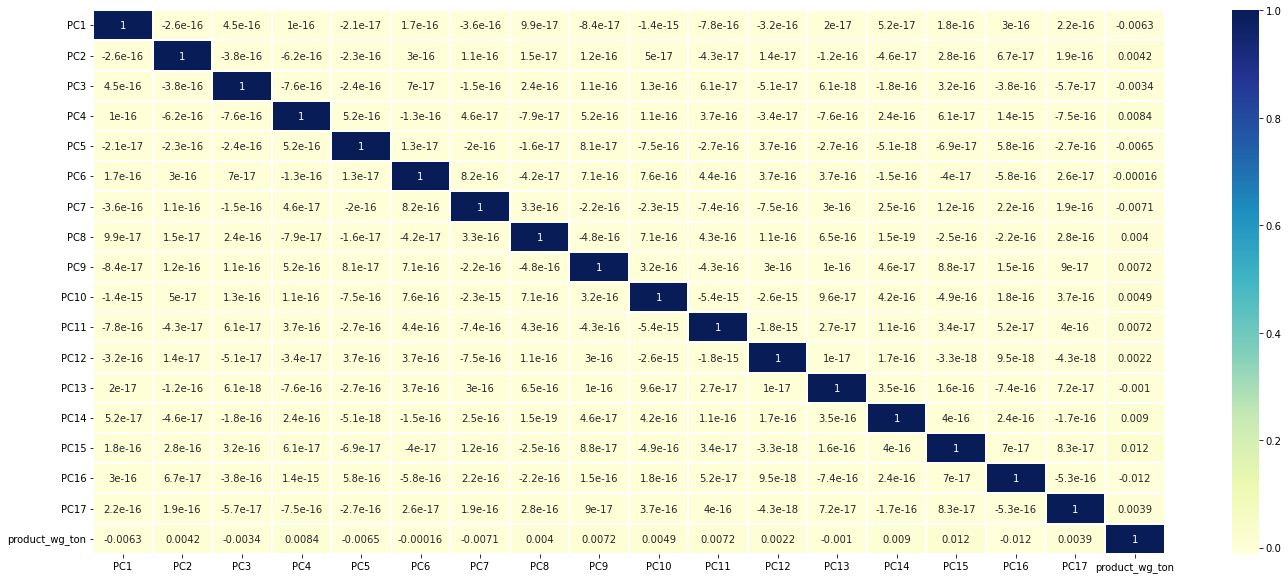

In [278]:
plt.figure(figsize=(24,10))

corr_pca = pca_df.corr()
mask = np.triu(np.ones_like(corr_pca, dtype= bool))
sns.heatmap(corr_pca,
            cmap="YlGnBu",
           annot = True,
           linewidths=.2)

**Building Model post PCA**

In [279]:
X_pca = pca_df.drop('product_wg_ton', axis = 1)
y_pca = pca_df['product_wg_ton']

In [280]:
X_train_pca,X_test_pca,y_train_pca,y_test_pca = train_test_split(X_pca,y_pca,test_size=0.3,random_state=42)

#cerating instance of GradientBoostingRegressor()
model_pca= GradientBoostingRegressor()
#Fitting to the train data
model_pca.fit(X_train_pca,y_train_pca)
#Predicting on test data:
y_preds_pca = model_pca.predict(X_test_pca)

#Calculating the r2_score and RMSE:
r2_pca = r2_score(y_test_pca,y_preds_pca)
rmse_pca = np.sqrt(mean_squared_error(y_test_pca,y_preds_pca))
print("r2_score:{}".format(r2))
print("RMSE : {}".format(rmse))

r2_score:0.9931550934935867
RMSE : 958.8336397381371


In [281]:
# Retrieve the feature importance scores
importance_scores_pca = model_pca.feature_importances_

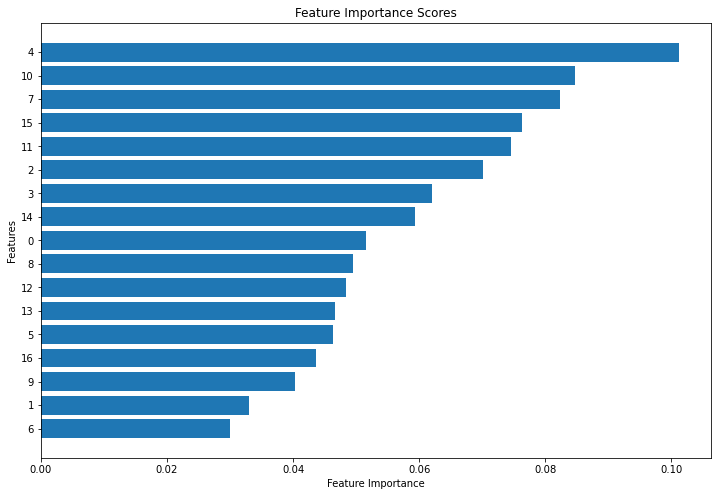

In [282]:
# Assuming 'importance_scores' contains the feature importance scores
features_pca = np.arange(len(importance_scores_pca))
sorted_indices_pca = np.argsort(importance_scores_pca)

# Create a horizontal bar plot
plt.figure(figsize=(12,8))
plt.barh(features_pca,importance_scores_pca[sorted_indices_pca])
plt.yticks(features_pca, sorted_indices_pca)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Scores')
plt.show()

In [314]:
imputed_data = imputed_data.reset_index()

In [318]:
imputed_data.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,0,1,4,3,1,2,4740,0,42,1,0,1,112,25.0,2009.0,18,0,4,6,24,24071
1,0,2,3,0,8,0,2,5053,1,37,0,0,1,152,35.0,2009.0,23,1,1,3,3,32134
2,0,0,3,5,8,0,4,4449,0,38,0,0,1,77,27.0,2010.0,24,0,2,3,6,30142
3,0,2,2,5,8,1,4,5381,1,42,0,0,1,124,22.0,2013.0,13,1,1,5,2,18082
4,0,0,1,5,7,1,3,4623,0,31,0,0,1,150,37.0,1999.0,17,0,3,4,6,21125


### Building Machine Learning Models:

In [319]:
#Model selection libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,learning_curve

#ML models
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor, GradientBoostingRegressor
import xgboost
from xgboost import XGBRegressor

#Model Evaluation libraries
from sklearn.metrics import r2_score,mean_squared_error

In [320]:
def train_and_test_split(data,tcol,testSize=0.3, randomState = 3):
    X = data.drop(tcol, axis = 1)
    y = data[tcol]
    return train_test_split(X,y,test_size=testSize,random_state=randomState )

In [321]:
def model_builder(model_name, model, data,t_col):
    x_train,x_test,y_train,y_test = train_and_test_split(data,t_col)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    result = [model_name,r2,rmse]
    return result

In [322]:
 def multiple_models(data, t_col):
        col_names = ['Model_Name','r2_Score','rmse']
        result = pd.DataFrame(columns = col_names)
        result.loc[len(result)]= model_builder('Linear regression',LinearRegression(),data,t_col)
        result.loc[len(result)]= model_builder('Lasso',Lasso(),data,t_col)
        result.loc[len(result)]= model_builder('Ridge',Ridge(),data,t_col)
        result.loc[len(result)]= model_builder('Decision tree',DecisionTreeRegressor(),data,t_col)
        result.loc[len(result)]= model_builder('KNN',KNeighborsRegressor(),data,t_col)
        result.loc[len(result)]= model_builder('Random forrest',RandomForestRegressor(),data,t_col)
        result.loc[len(result)]= model_builder('SVM',SVR(),data,t_col)
        result.loc[len(result)]= model_builder('Gboost',GradientBoostingRegressor(),data,t_col)
        result.loc[len(result)]= model_builder('Xgboost',XGBRegressor(),data,t_col)
        result.loc[len(result)]= model_builder('Adaboost',AdaBoostRegressor(),data,t_col)
        return result.sort_values(by='r2_Score',ascending = False)

In [324]:
results = multiple_models(imputed_data,'product_wg_ton')
results

,Model_Name,r2_Score,rmse
7,Gboost,0.994012,901.511317
8,Xgboost,0.993911,909.058674
5,Random forrest,0.993629,929.904025
3,Decision tree,0.988906,1227.041190
1,Lasso,0.977939,1730.365350
2,Ridge,0.977936,1730.474609
0,Linear regression,0.977936,1730.474805
9,Adaboost,0.976961,1768.284485
4,KNN,0.638951,7000.122247
6,SVM,-0.000105,11650.511871


**K-Fold Cross Validation:**

In [325]:
def k_fold_cv(X, y , fold=10):
    score_LR = cross_val_score(LinearRegression(),X,y,cv=fold)
    score_LS = cross_val_score(Lasso(),X,y,cv=fold)
    score_RD = cross_val_score(Ridge(),X,y,cv=fold)
    score_DTR = cross_val_score(DecisionTreeRegressor(),X,y,cv=fold)
    score_KNN = cross_val_score(KNeighborsRegressor(),X,y,cv=fold)
    score_RF = cross_val_score(RandomForestRegressor(),X,y,cv=fold)
    score_SVM = cross_val_score(SVR(),X,y,cv=fold)
    score_GB = cross_val_score(GradientBoostingRegressor(),X,y,cv=fold)
    score_XGB = cross_val_score(XGBRegressor(),X,y,cv=fold)
    score_ADA = cross_val_score(AdaBoostRegressor(),X,y,cv=fold)
    
    model_name = ['Linear Regression','Lasso','Ridge','Decision tree','KNN','Random Forrest','SVM','Gradient Boost','XG Boost','ADA Boost']
    scores = [score_LR,score_LS,score_RD,score_DTR,score_KNN,score_RF,score_SVM,score_GB,score_XGB,score_ADA]
    result = []
    for i in range(len(model_name)):
        score_mean = np.mean(scores[i])
        score_std = np.std(scores[i])
        m_name = model_name[i]
        temp = [m_name,score_mean,score_std]
        result.append(temp)
        
    k_fold_df = pd.DataFrame(result,columns = ['Model Name','CV Accuracy','CV STD'])
    return k_fold_df.sort_values(by = 'CV Accuracy', ascending = False)

In [326]:
X = imputed_data.drop('product_wg_ton', axis = 1)
y = imputed_data['product_wg_ton']

In [327]:
k_fold_results = k_fold_cv(X,y)

In [328]:
k_fold_results

,Model Name,CV Accuracy,CV STD
8,XG Boost,0.993636,0.000962
7,Gradient Boost,0.993610,0.001110
5,Random Forrest,0.993547,0.001067
3,Decision tree,0.987998,0.002134
1,Lasso,0.977179,0.005517
2,Ridge,0.977178,0.005513
0,Linear Regression,0.977178,0.005513
9,ADA Boost,0.975722,0.001708
4,KNN,0.659199,0.013280
6,SVM,-0.025748,0.007669


### Building Learning Curves:

In [332]:
def generate_learning_curve(model_name , estimator , X , y):
    train_size , train_score , test_score = learning_curve(estimator = estimator , X = X , y = y , cv = 5)
    train_score_mean = np.mean(train_score , axis = 1)
    test_score_mean = np.mean(test_score , axis = 1)
    plt.plot(train_size , train_score_mean , c = 'blue')
    plt.plot(train_size , test_score_mean , c = 'red')
    plt.xlabel('Samples')
    plt.ylabel('R2 Score')
    plt.title('Learning Curve for ' + model_name)
    plt.legend(('Training R2 Score' , 'Testing R2 Score'))

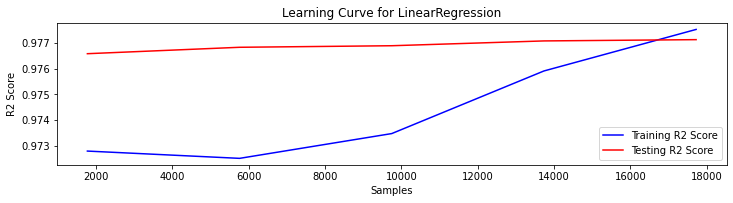

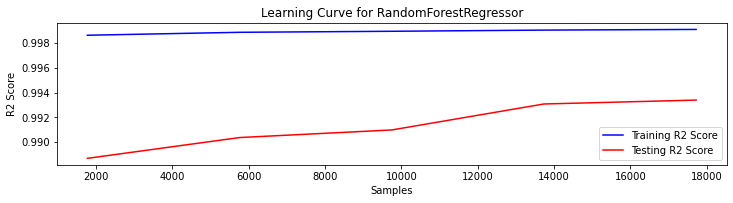

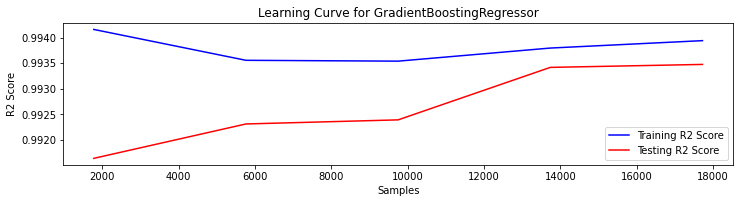

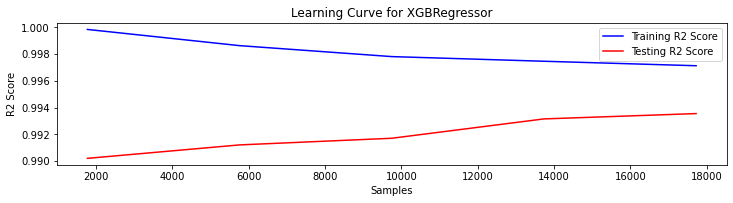

In [335]:
models = [LinearRegression(),RandomForestRegressor(), GradientBoostingRegressor(), 
              XGBRegressor()]
for a , model in enumerate (models):
    fig = plt.figure(figsize= (12 , 12))
    ax = fig.add_subplot(4 , 1 , a+1)
    generate_learning_curve(type(models[a]).__name__ , model ,X=X,y=y)

**Feature Importance Using XGBoost:**

In [336]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [337]:
xgb = XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

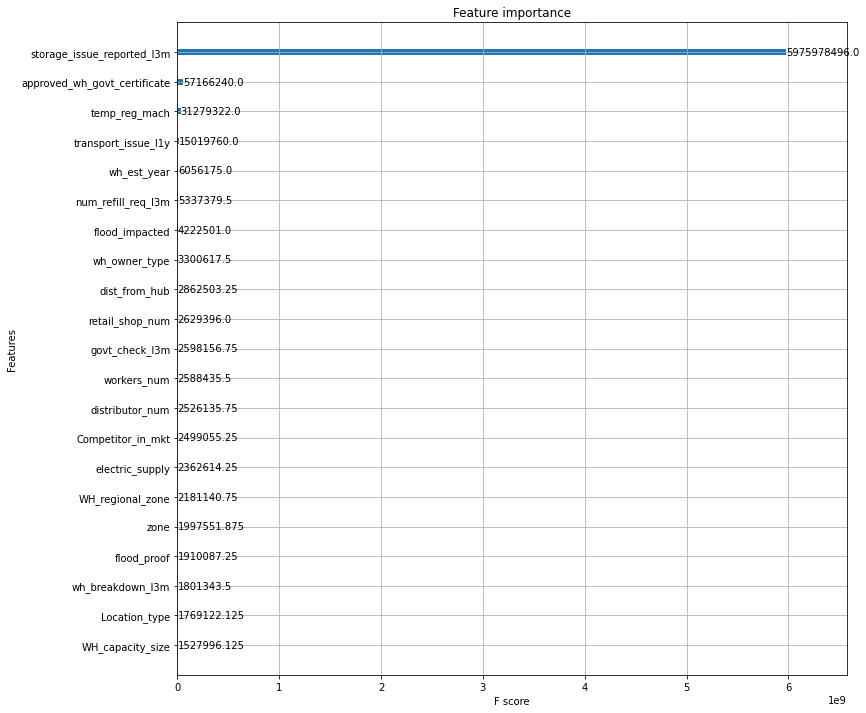

In [342]:
fig,ax = plt.subplots(1,1, figsize=(12,12))
xgboost.plot_importance(xgb,ax=ax, importance_type='gain')

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

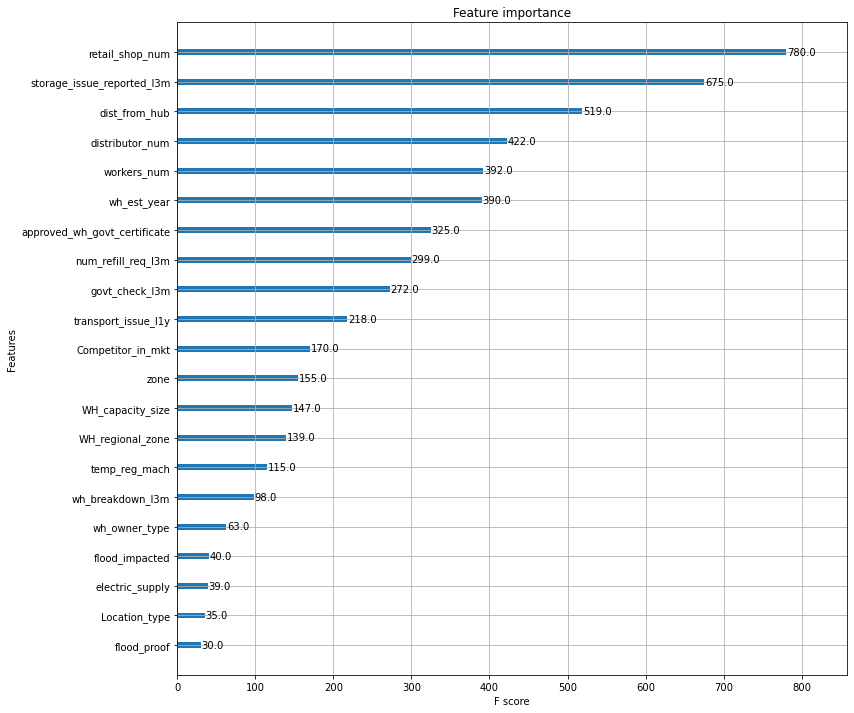

In [341]:
fig,ax = plt.subplots(1,1, figsize=(12,12))
xgboost.plot_importance(xgb,ax=ax)